a. Immporting the Packages

In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt   

b. Load the train and test data

In [2]:
#using the MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

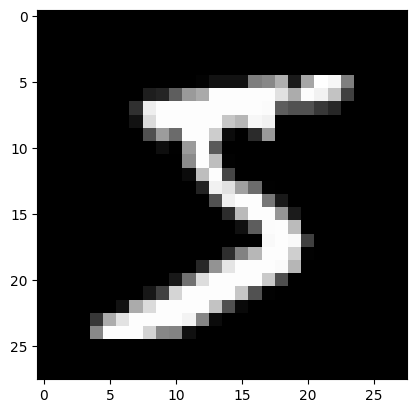

In [17]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

c. Defining the Network architecture

In [5]:
model = Sequential([
    Flatten(input_shape =(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='softmax')
])

c:\Users\muggs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer=SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,898 (441.01 KB)

 Trainable params: 112,896 (441.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

d. Train the model using SGD for 11 epochs

In [7]:
train = model.fit(x_train,y_train,epochs=11, validation_data=(x_test,y_test))

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6642 - loss: 1.3962 - val_accuracy: 0.9043 - val_loss: 0.3392
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9053 - loss: 0.3300 - val_accuracy: 0.9240 - val_loss: 0.2718
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9221 - loss: 0.2721 - val_accuracy: 0.9318 - val_loss: 0.2372
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9348 - loss: 0.2311 - val_accuracy: 0.9390 - val_loss: 0.2125
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9398 - loss: 0.2090 - val_accuracy: 0.9455 - val_loss: 0.1898
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9474 - loss: 0.1832 - val_accuracy: 0.9488 - val_loss: 0.1769
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9531 - loss: 0.1637 - val_accuracy: 0.9543 - val_loss: 0.1575
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9582 - loss: 0.1483 - 

e. Evaluating the Network

In [8]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.9571 - loss: 0.1487
Test accuracy: 96.22%


f. Plotting the training loss and accuracy

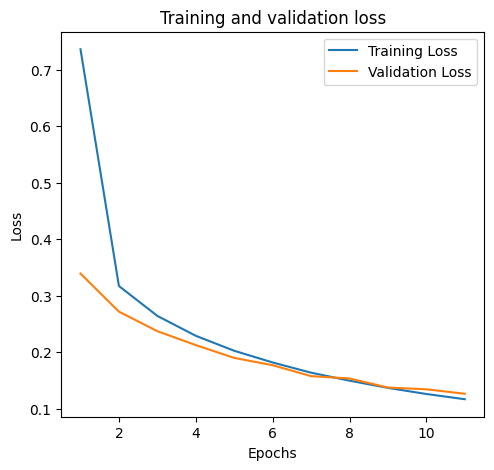

In [15]:
epochs = range(1,12)

plt.figure(figsize=(12,5))

#loss
plt.subplot(1,2,1)
plt.plot(epochs, train.history['loss'],label='Training Loss')
plt.plot(epochs, train.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and validation loss")
plt.show()

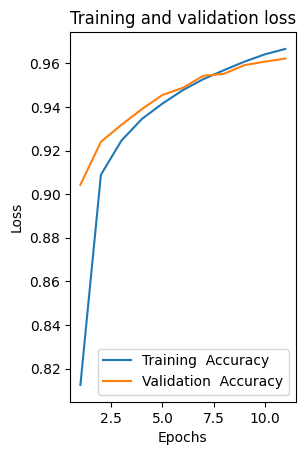

In [14]:
#accuracy
plt.subplot(1,2,1)
plt.plot(epochs,train.history['accuracy'], label='Training  Accuracy')
plt.plot(epochs,train.history['val_accuracy'], label='Validation  Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and validation loss")

plt.show()

In [27]:
import numpy as np
import random


Testing on a few Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


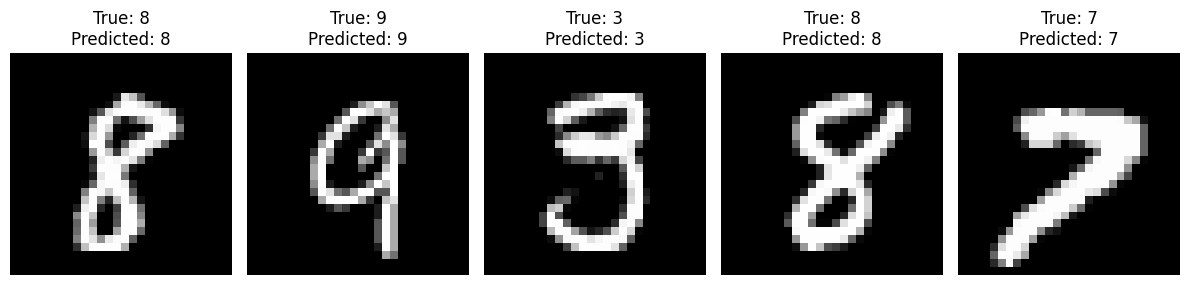

In [31]:
num = 5
indices = random.sample(range(len(x_test)),num)
plt.figure(figsize=(12, 8))
for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28,28)
    true_label = y_test[idx]
    prediction = model.predict(x_test[idx].reshape(1,28,28))
    predicted_label = np.argmax(prediction)

    plt.subplot(1, num, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()